In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('data_car.csv')
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


# EDA

In [3]:
data.shape

(11914, 16)

In [4]:
data.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [5]:
data['Popularity'] = data['Popularity'].astype(float)

In [6]:
data.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity           float64
MSRP                   int64
dtype: object

In [7]:
data.head(10).style.background_gradient(cmap = 'copper')

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.000000,6.000000,MANUAL,rear wheel drive,2.000000,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916.000000,46135
1,BMW,1 Series,2011,premium unleaded (required),300.000000,6.000000,MANUAL,rear wheel drive,2.000000,"Luxury,Performance",Compact,Convertible,28,19,3916.000000,40650
2,BMW,1 Series,2011,premium unleaded (required),300.000000,6.000000,MANUAL,rear wheel drive,2.000000,"Luxury,High-Performance",Compact,Coupe,28,20,3916.000000,36350
3,BMW,1 Series,2011,premium unleaded (required),230.000000,6.000000,MANUAL,rear wheel drive,2.000000,"Luxury,Performance",Compact,Coupe,28,18,3916.000000,29450
4,BMW,1 Series,2011,premium unleaded (required),230.000000,6.000000,MANUAL,rear wheel drive,2.000000,Luxury,Compact,Convertible,28,18,3916.000000,34500
5,BMW,1 Series,2012,premium unleaded (required),230.000000,6.000000,MANUAL,rear wheel drive,2.000000,"Luxury,Performance",Compact,Coupe,28,18,3916.000000,31200
6,BMW,1 Series,2012,premium unleaded (required),300.000000,6.000000,MANUAL,rear wheel drive,2.000000,"Luxury,Performance",Compact,Convertible,26,17,3916.000000,44100
7,BMW,1 Series,2012,premium unleaded (required),300.000000,6.000000,MANUAL,rear wheel drive,2.000000,"Luxury,High-Performance",Compact,Coupe,28,20,3916.000000,39300
8,BMW,1 Series,2012,premium unleaded (required),230.000000,6.000000,MANUAL,rear wheel drive,2.000000,Luxury,Compact,Convertible,28,18,3916.000000,36900
9,BMW,1 Series,2013,premium unleaded (required),230.000000,6.000000,MANUAL,rear wheel drive,2.000000,Luxury,Compact,Convertible,27,18,3916.000000,37200


In [8]:
data.describe().style.background_gradient(cmap = 'ocean')

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.000000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,11914.000000
mean,2010.384338,249.386070,5.628829,3.436093,26.637485,19.733255,1554.911197,40594.737032
std,7.579740,109.191870,1.780559,0.881315,8.863001,8.987798,1441.855347,60109.103604
min,1990.000000,55.000000,0.000000,2.000000,12.000000,7.000000,2.000000,2000.000000
25%,2007.000000,170.000000,4.000000,2.000000,22.000000,16.000000,549.000000,21000.000000
50%,2015.000000,227.000000,6.000000,4.000000,26.000000,18.000000,1385.000000,29995.000000
75%,2016.000000,300.000000,6.000000,4.000000,30.000000,22.000000,2009.000000,42231.250000
max,2017.000000,1001.000000,16.000000,4.000000,354.000000,137.000000,5657.000000,2065902.000000


In [9]:
data.isna().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [10]:
data.nunique()

Make                   48
Model                 915
Year                   28
Engine Fuel Type       10
Engine HP             356
Engine Cylinders        9
Transmission Type       5
Driven_Wheels           4
Number of Doors         3
Market Category        71
Vehicle Size            3
Vehicle Style          16
highway MPG            59
city mpg               69
Popularity             48
MSRP                 6049
dtype: int64

<AxesSubplot:>

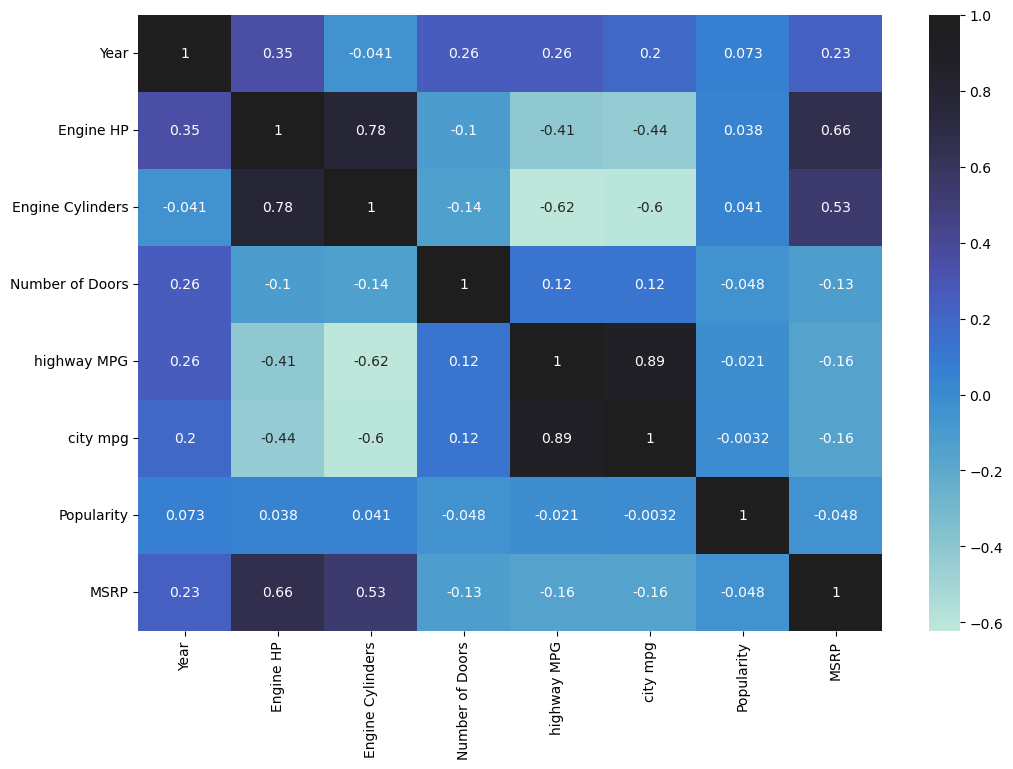

In [11]:
plt.figure(figsize=(12, 8))
sns.heatmap(pd.DataFrame(data, columns=data.columns).corr(), annot=True, center=True)

In [12]:
data=data.dropna()

In [13]:
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916.0,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916.0,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916.0,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916.0,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916.0,34500


In [14]:
cat_cols = data.select_dtypes(include=['object']).columns
num_cols = data.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['Make', 'Model', 'Engine Fuel Type', 'Transmission Type',
       'Driven_Wheels', 'Market Category', 'Vehicle Size', 'Vehicle Style'],
      dtype='object')
Numerical Variables:
['Year', 'Engine HP', 'Engine Cylinders', 'Number of Doors', 'highway MPG', 'city mpg', 'Popularity', 'MSRP']


Year
Skew : -1.83


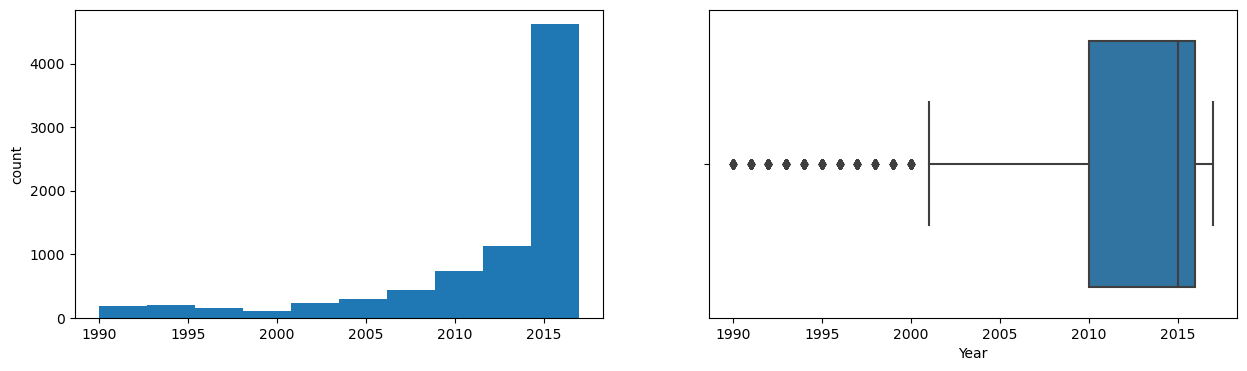

Engine HP
Skew : 1.13


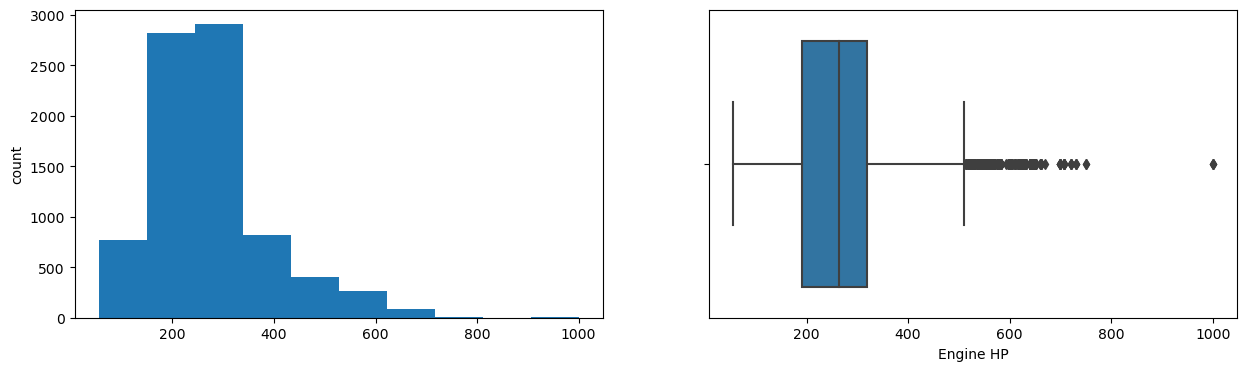

Engine Cylinders
Skew : 1.1


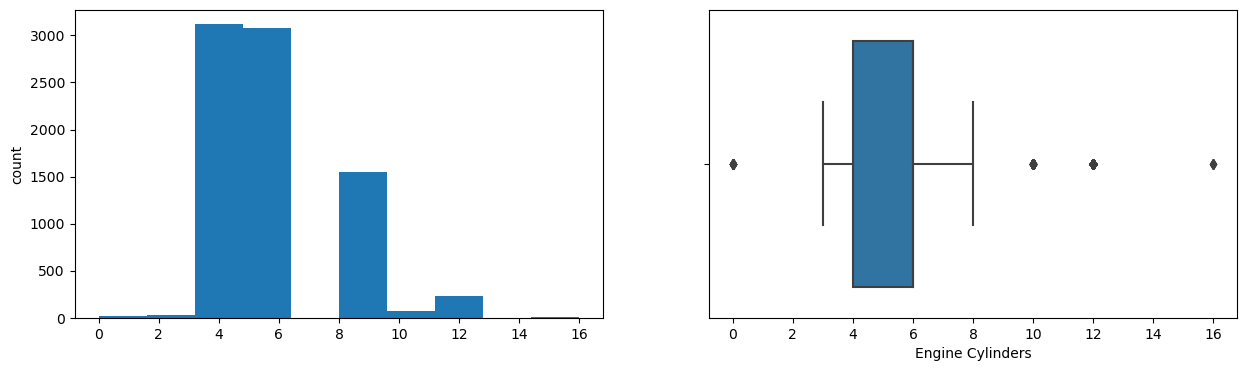

Number of Doors
Skew : -0.91


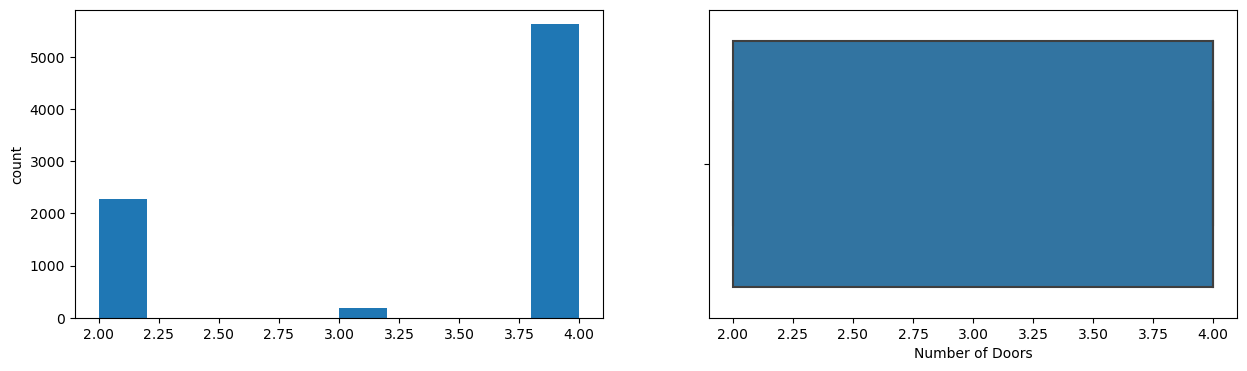

highway MPG
Skew : 11.36


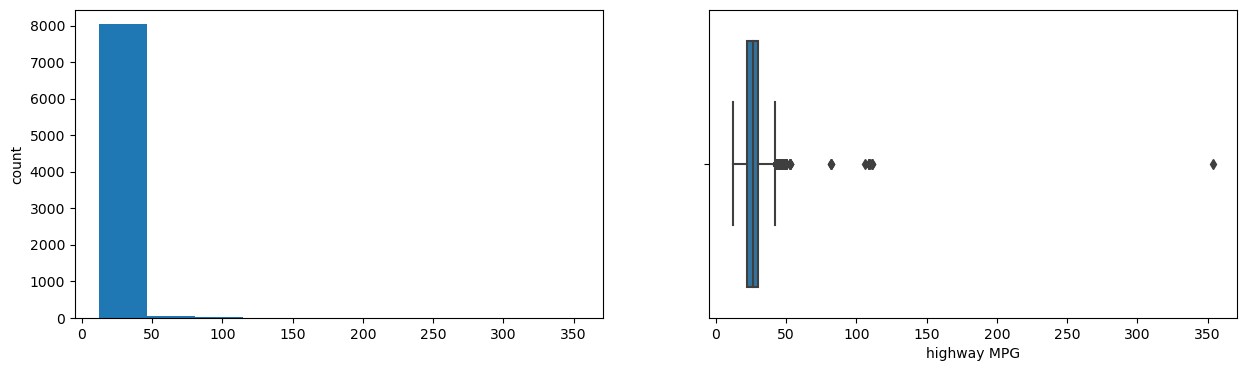

city mpg
Skew : 5.95


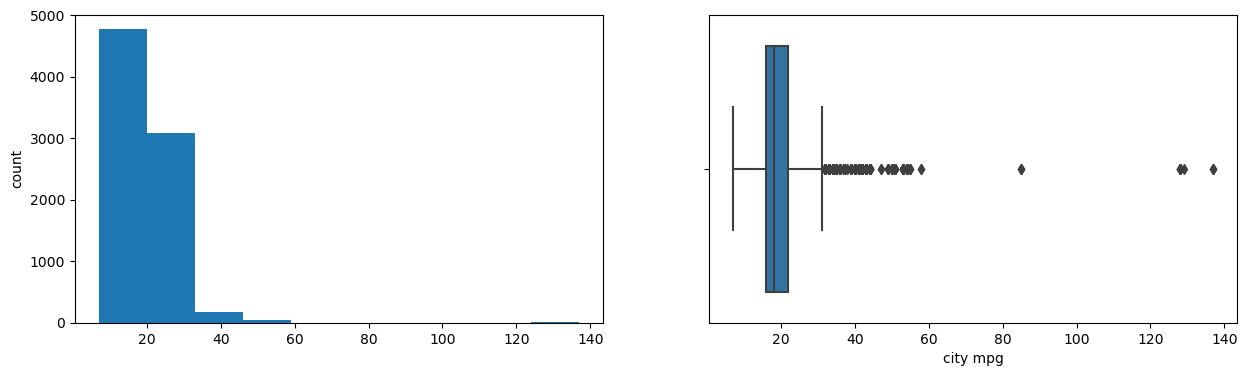

Popularity
Skew : 1.61


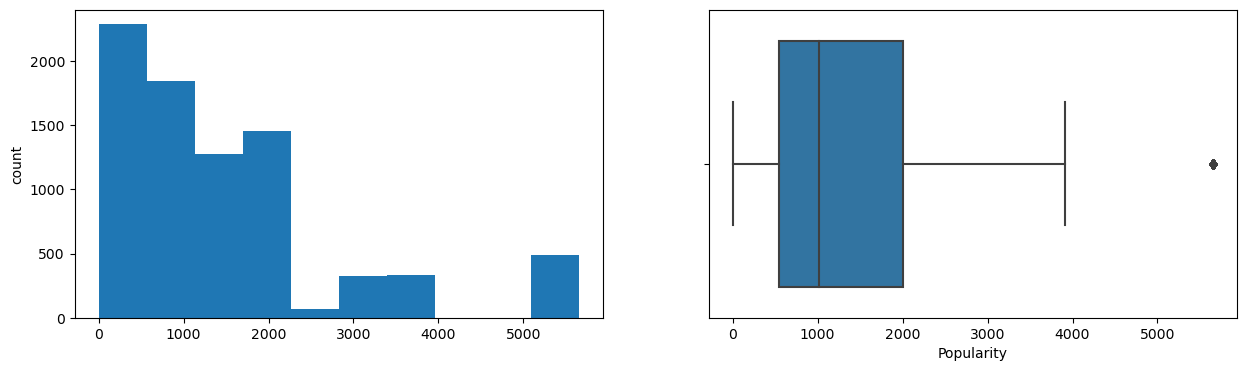

MSRP
Skew : 10.46


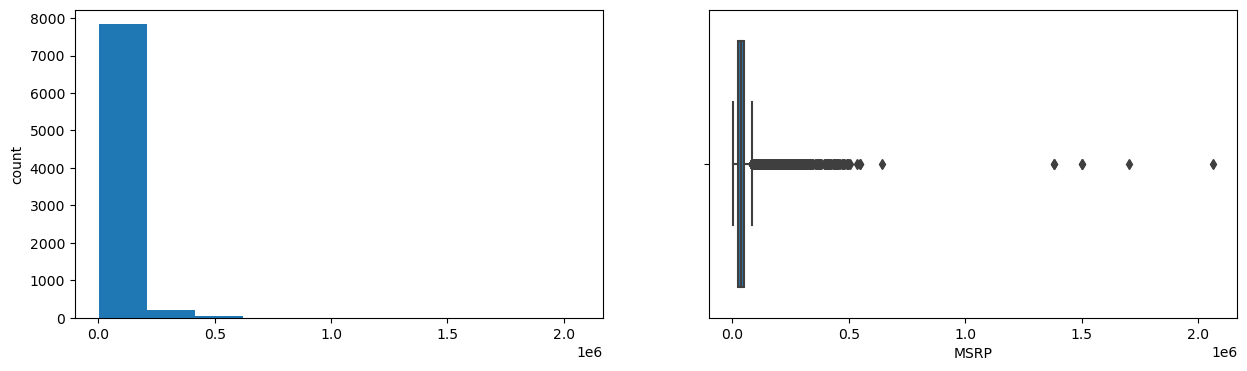

In [15]:
for col in num_cols:
    print(col)
    print('Skew :', round(data[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    data[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])
    plt.show()

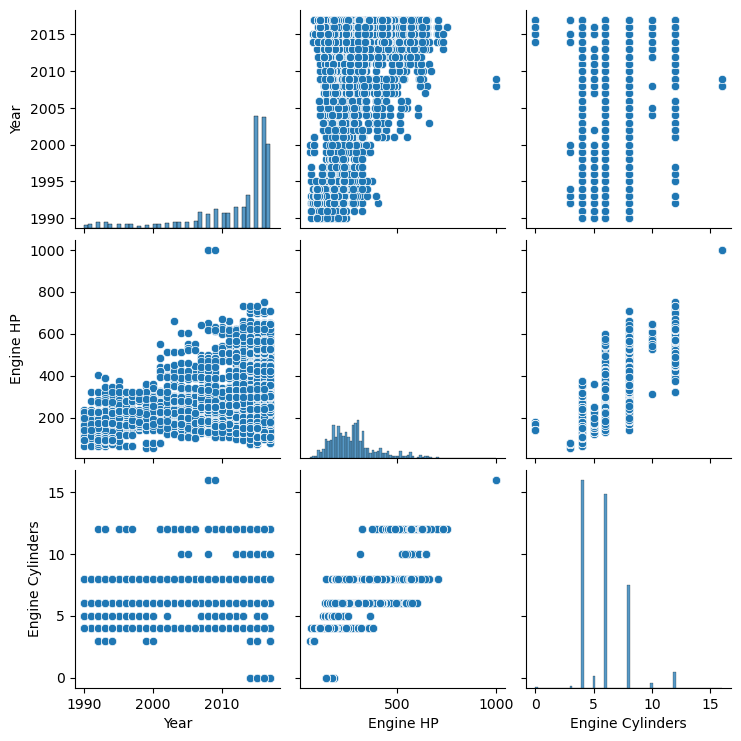

In [16]:
sns.pairplot(data[['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP', 'Engine Cylinders']])
plt.show()

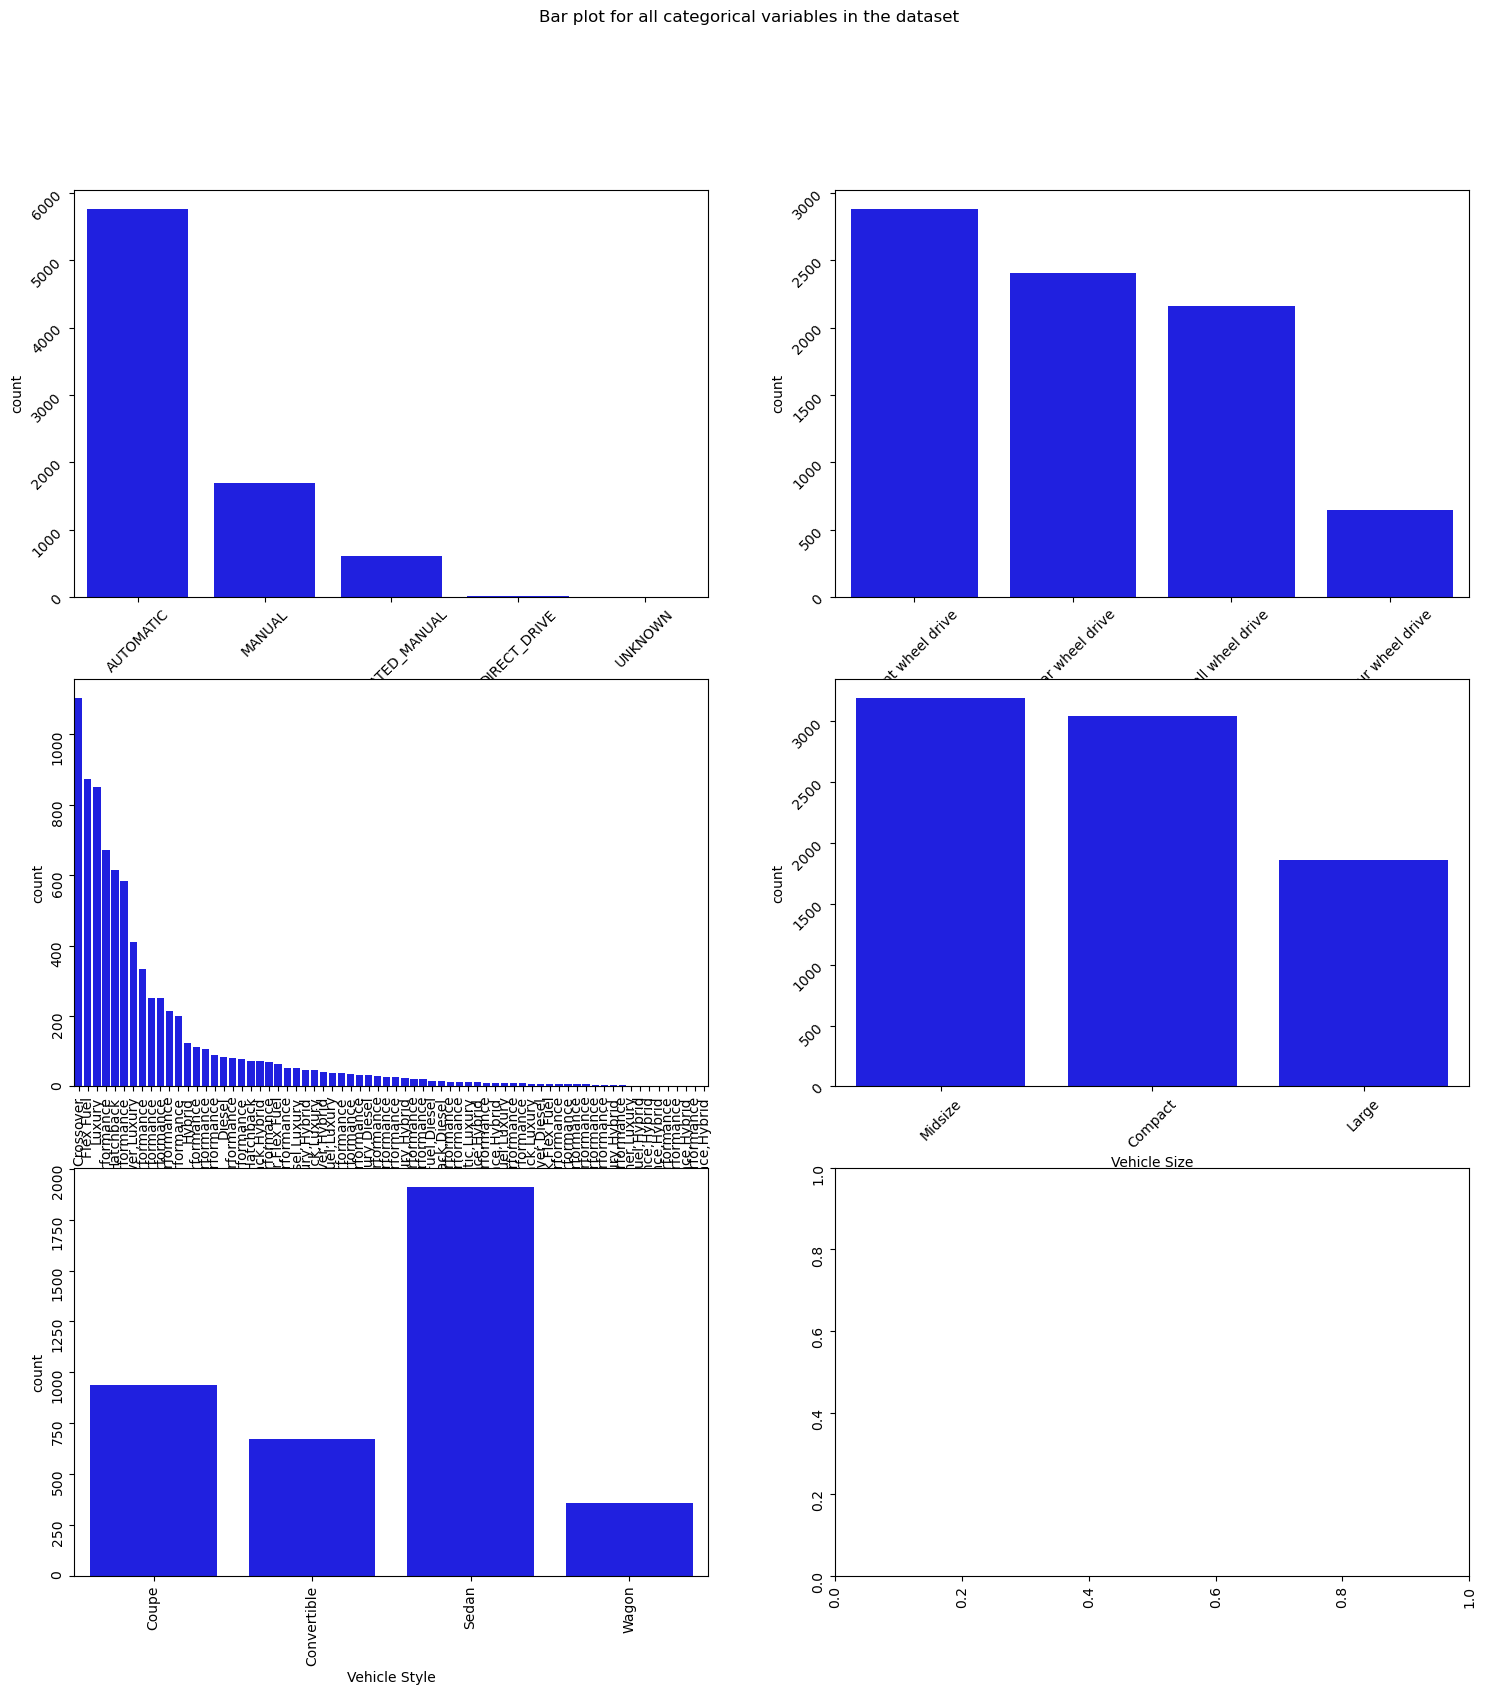

In [17]:
fig, axes = plt.subplots(3, 2, figsize = (18, 18))
fig.suptitle('Bar plot for all categorical variables in the dataset')
sns.countplot(ax = axes[0, 0], x = 'Transmission Type', data = data, color = 'blue', 
              order = data['Transmission Type'].value_counts().index);
sns.countplot(ax = axes[0, 1], x = 'Driven_Wheels', data = data, color = 'blue', 
              order = data['Driven_Wheels'].value_counts().index);
sns.countplot(ax = axes[1, 0], x = 'Market Category', data = data, color = 'blue', 
              order = data['Market Category'].value_counts().index);
sns.countplot(ax = axes[1, 1], x = 'Vehicle Size', data = data, color = 'blue', 
              order = data['Vehicle Size'].value_counts().index);
sns.countplot(ax = axes[2, 0], x = 'Vehicle Style', data = data, color = 'blue', 
              order = data['Vehicle Style'].head(20).value_counts().index);
axes[0][1].tick_params(labelrotation=45);
axes[0][0].tick_params(labelrotation=45);
axes[1][0].tick_params(labelrotation=90)
axes[1][1].tick_params(labelrotation=45);
axes[2][0].tick_params(labelrotation=90);
axes[2][1].tick_params(labelrotation=90);
plt.show()

# Pre-Processing

In [18]:
data['Popularity'].value_counts()

1385.0    614
873.0     581
5657.0    492
1624.0    397
617.0     352
3916.0    334
190.0     330
3105.0    328
1851.0    320
2009.0    308
2031.0    300
2202.0    282
870.0     281
549.0     270
204.0     252
586.0     239
640.0     214
1439.0    214
454.0     202
61.0      156
258.0     143
1715.0    136
436.0     125
155.0     125
376.0     111
1720.0    109
1013.0    108
481.0      99
259.0      93
210.0      77
520.0      74
2774.0     68
238.0      58
1158.0     52
105.0      48
535.0      39
819.0      38
86.0       31
613.0      29
130.0      17
67.0       16
113.0       5
416.0       5
2.0         3
21.0        3
26.0        3
820.0       3
Name: Popularity, dtype: int64

In [19]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [20]:
# Handle missing values (example: impute missing values with the median)
data['Engine HP'].fillna(data['Engine HP'].median(), inplace=True)

# Encode categorical variables
label_encoder = LabelEncoder()
data['Make'] = label_encoder.fit_transform(data['Make'])
data['Model'] = label_encoder.fit_transform(data['Model'])
data['Engine Fuel Type'] = label_encoder.fit_transform(data['Engine Fuel Type'])

# Convert the categorical column using one-hot encoding
one_hot_encoded = pd.get_dummies(data['Engine Fuel Type'], prefix='EngineFuel')
data = pd.concat([data, one_hot_encoded], axis=1)

# Drop the original categorical column
data.drop('Engine Fuel Type', axis=1, inplace=True)


In [21]:
# Split the dataset into training and testing sets
X = data.drop('Popularity', axis=1)
y = data['Popularity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
# Normalize numerical features
scaler = StandardScaler()
X_train[['Year', 'Engine HP', 'Engine Cylinders']] = scaler.fit_transform(X_train[['Year', 'Engine HP', 'Engine Cylinders']])
X_test[['Year', 'Engine HP', 'Engine Cylinders']] = scaler.transform(X_test[['Year', 'Engine HP', 'Engine Cylinders']])


# Modelling

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [24]:
# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

ValueError: could not convert string to float: 'AUTOMATIC'

In [ ]:

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

# Fine tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Perform grid search for hyperparameter tuning
param_grid = {'fit_intercept': [True, False]}
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

In [ ]:
# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

In [ ]:
# Evaluate the model with the best hyperparameters
best_model = LinearRegression(**best_params)
best_model.fit(X_train, y_train)
y_pred_tuned = best_model.predict(X_test)

In [ ]:
# Evaluate the tuned model's performance
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
mae_tuned = mean_absolute_error(y_test, y_pred_tuned)
print("Tuned Model - Mean Squared Error:", mse_tuned)
print("Tuned Model - Mean Absolute Error:", mae_tuned)